# Final Tutorial - Around the World in 80 Days

### By Imad Khokher and Ayokiitan Akala

## Brief Introduction 

For this tutorial, we landed on a dataset from the World Bank which is publicly available and updated annually:
http://databank.worldbank.org/data/reports.aspx?Code=NY.GDP.MKTP.KD.ZG&id=1ff4a498&report_name=Popular-Indicators&populartype=series&ispopular=y

This dataset coalesces all the popular indicators of different geographic regions around the world, separated by countries. There were countless indicators present within this dataset, but we specifically chose a few to zoom into and take a closer look at for critical observing. Some different factors that we chose include: Total country population, Mortality rates, Life expectancy at birth, Poverty headout, etc. This dataset separates the information and delivers it via chronological order, with records dating back to 2000 and going all the way up until 2015. We wanted to observe some potential relationships between these factors in order to make some conclusions, or generalizations, about these different indicators.


## 1. Getting Started

#### Required Tools

You will need Python 3.5 or higher and the following libraries (i.e pip install [Library Name]):

* Pandas: https://pandas.pydata.org/ 
* Numpy: http://www.numpy.org/ 
* Matplotlib: https://matplotlib.org/ 
* Scikit-learn: http://scikit-learn.org/ 
* Plotly: https://plot.ly/ 
* Geopy: https://pypi.python.org/pypi/geopy 
* Folium: https://folium.readthedocs.io/en/latest/

Anaconda is a great resource to manage all the dependencies and make sure that you don't clobber any previous versions and keep updated on innovations on python libraries.

Here we import the necessary libraries for python to use:


In [1]:
import math
import folium
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import sklearn.metrics
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### 1.1 Digesting Data

We utilized a native method from pandas in order to parse a CSV (comma separated values) file. This will make it much easier to read our data by inserting it into a dataframe as a set of raw and untidy values.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html 

Here, we can see this “raw” and “untidy” dataframe by referencing the top few elements.

In [2]:
#load our data into dataframe
pop_indicators = pd.read_csv("Indicators.csv")
#print first 5 rows of our data in a human-readable form.
pop_indicators.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,20093756,20966463,21979923,23064851,24118979,25070798,25893450,26616792,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31183660,31592153,31995046,32403514,32831096,33288437,33777915,34300076,34860715,35465760,36117637,36819558,37565847,38338562,39113313,39871528
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,57521,58175,58731,59117,59264,59118,58650,57903,57030,56227,55637,55320,55230,55307,55437,55537
4,"Population, total",SP.POP.TOTL,Andorra,AND,65390,67341,70049,73182,76244,78867,80991,82683,83861,84462,84449,83751,82431,80788,79223,78014


### 1.2 Looking at our Data


Here we can see that our data is split upon different indicators, one of which is the total population in a specific country. The data is parameterized by the different years ranging from years 2000 to 2015; this is very good for machine learning in order to predict future values using supervised learning methods such as Decision trees or even linear regression. Before we do that we must massage our data into an easier form for us to go into exploratory data analysis and eventually Machine Learning.

Some characteristics of our data upon exploring the dataset are:
* 217 countries per Indicator
* Values are all in Strings format
* Superfluous columns (Series Code and Country Code)
* Long Column names (eg. 2005 [YR2005])
* Missing data coded as “..”

These are all characteristics we have to keep in mind for when we want to tidy our data

### 1.3 Tidying Data

As mentioned earlier, the initial dataframe is parsed as raw, uncleaned, and rather difficult to digest conclusively. Here we tidy it up a bit, by doing a few different things to the dataframe. 

Here a conclusive list of what we did:
* Replaced “..” (blank, or missing) items with ‘NaN’ for easier interpretation in Python
* Discretized 10 important  Popular indicators into 10 dataframes
* Dropped all unnecessary columns
* Reindexed all 10 new dataframes to act as standalone entities
* Truncated column names (eg. 2005 [YR2005] -> 2005 )
* Casted all integer values to floats for easier mathematical computation
* Later replaced missing data using hot-deck imputation to predict the missing values based on all other values within the table


In [3]:
# Grabs the names of all columns within the dataframe
col_names = pop_indicators.columns.values
# Uses all columns after the 4th - rest are not necessary
col_names = col_names[4:]
# Replaces all '..' with NaN
pop_indicators = pop_indicators.replace({'\.\.': 'NaN'}, regex=True)

# Renames columns to make them appear simpler
for c in col_names:
    pop_indicators[c[:4]] = pop_indicators[c]
    pop_indicators = pop_indicators.drop(c, 1)
    
# Dropping unnecessary columns
pop_indicators = pop_indicators.drop("Series Code", 1)
pop_indicators = pop_indicators.drop("Country Code", 1)

col_names = pop_indicators.columns.values
col_names = col_names[2:]

for c in col_names:
    pop_indicators[c] = pop_indicators[c].astype(float)

# As you can see below, the data now appears much cleaner than before
pop_indicators.head()

,Series Name,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,"Population, total",Afghanistan,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
1,"Population, total",Albania,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
2,"Population, total",Algeria,31183660.0,31592153.0,31995046.0,32403514.0,32831096.0,33288437.0,33777915.0,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0
3,"Population, total",American Samoa,57521.0,58175.0,58731.0,59117.0,59264.0,59118.0,58650.0,57903.0,57030.0,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0
4,"Population, total",Andorra,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0


In [4]:
# Initialize array of top dataframes
top_dfs = []

# The names of indicators that will be observed
top_indicators = ['Population, total', 'Mortality rate, under-5 (per 1,000 live births)', 
                  'Immunization, measles (% of children ages 12-23 months)', 'GDP (current US$)',
                  'Life expectancy at birth, total (years)', 'Income share held by lowest 20%',
                  'Poverty headcount ratio at national poverty lines (% of population)', 
                  'School enrollment, secondary (% gross)', 'Inflation, consumer prices (annual %)', 
                  'Market capitalization of listed domestic companies (% of GDP)']

indicator_map = {}

for i in range(len(top_indicators)):
    indicator_map[top_indicators[i]] = i
    
# discretized different popular indicators 
for i in top_indicators:
    top_dfs.append(pop_indicators.loc[pop_indicators["Series Name"] == i].reset_index())


i = 0
for data_frame in top_dfs:
    for c in range(3, 19):
        top_dfs[i][col_names[c-3]] = data_frame[col_names[c-3]].replace({float('nan'): data_frame[col_names[c-3]].mean()})
    i+=1
    

# For example, this is the dataframe that correlates with Mortality Rates
top_dfs[1].head()

,index,Series Name,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,3038,"Mortality rate, under-5 (per 1,000 live births)",Afghanistan,129.70000,126.000000,122.200000,118.300000,114.400000,110.300000,106.300000,102.200000,98.200000,94.100000,90.200000,86.400000,82.800000,79.300000,76.100000,73.200000
1,3039,"Mortality rate, under-5 (per 1,000 live births)",Albania,26.00000,24.800000,23.500000,22.400000,21.400000,20.400000,19.400000,18.600000,17.900000,17.200000,16.600000,16.000000,15.400000,14.900000,14.400000,14.000000
2,3040,"Mortality rate, under-5 (per 1,000 live births)",Algeria,39.70000,38.900000,37.800000,36.500000,35.100000,33.500000,32.100000,30.700000,29.400000,28.300000,27.300000,26.600000,26.100000,25.800000,25.600000,25.500000
3,3041,"Mortality rate, under-5 (per 1,000 live births)",American Samoa,57.22228,55.125907,52.998446,50.899482,48.970984,46.853368,44.920725,43.098446,41.471503,39.692746,38.695855,36.494819,35.098964,33.790674,32.565285,31.427979
4,3042,"Mortality rate, under-5 (per 1,000 live births)",Andorra,4.60000,4.400000,4.200000,4.100000,4.000000,3.800000,3.700000,3.600000,3.500000,3.400000,3.300000,3.200000,3.100000,3.000000,2.900000,2.800000


### 1.4 Explaination

For filling in missing data, we noticed some interesting problems. There are different decisions to be made about data that is nonexistent. We can either drop rows entirely with missing data, base our missing data on other known data via hot-deck imputation, or ignore the missingness entirely. For our purposes, we chose to fill the missing data in by averaging missing data points for a certain country with the average this year among all countries. Some alternatives to this approach is to average the missing attributes with the data present within the same row (aka, same country, but different year). However, we ran into complications with this approach due to some countries having no data to report at all for certain indicators. We should keep in mind that there are a variety of ways to deal with missing data such as this.

## 2. Exploratory Data Analysis

In this section, we explore visualizations of different indicators through our cleaner dataframes. The goal of this section is to view overall trends of the data for each of our indicators over the 16 years of time that is available to us. Due to the fact that there are over 217 different countries present within the entire dataframe, we are forced to take a sample of these countries to see trends within these specifically. Later on, we can explore countries more specifically through the lens of different geographic regions, but this is intended to be a very general plot between ten random countries from the dataframe for the sake of observing any obvious trends overtime and making any potential conclusions about the general well-being of the world as a whole based on the sample. It may be difficult to make generalizations based on only ten different countries, but adding more countries to plot will simply lead to messy visualizations that are not too easily interpreted.

### 2.1 Indicator Plots

For this section we decided to to make use of our large repository of countries and pull random samples of different countries found within our dataframe. We made 10 different plots for the different Popular indicators within our discretized array of dataframes. We can use these popular indicators and the visualization of them to draw conclusions on our data by making a hypothesis if what we observe in our data as these plots can be very good predictors for correlations in the future. We will eventually make a hypothesis and eventually figure out using stats, ML, and hypothesis testing to see whether we should reject or accept the null hypothesis. For some of the countries the correlation is not always obvious as we imputed some data for some of them using the mean of all values for that particular year. This is good if the data is uniformly distributed but that is not always the case so from time to time we may see hinges that are not always great when using linear regression this is why we may use a more sophisticated learning algorithms to consolidate for this. We plot are dat over 16 years, 2000 - 2015.

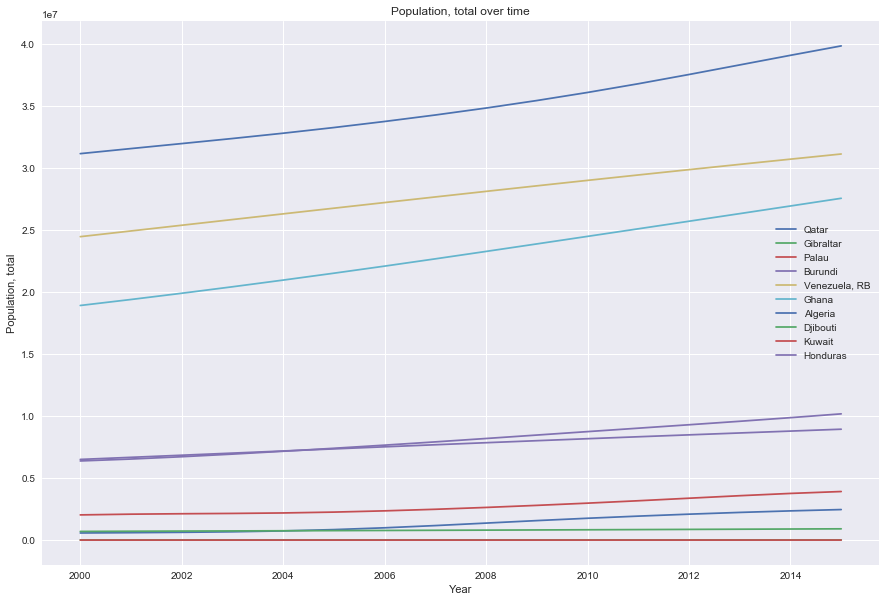

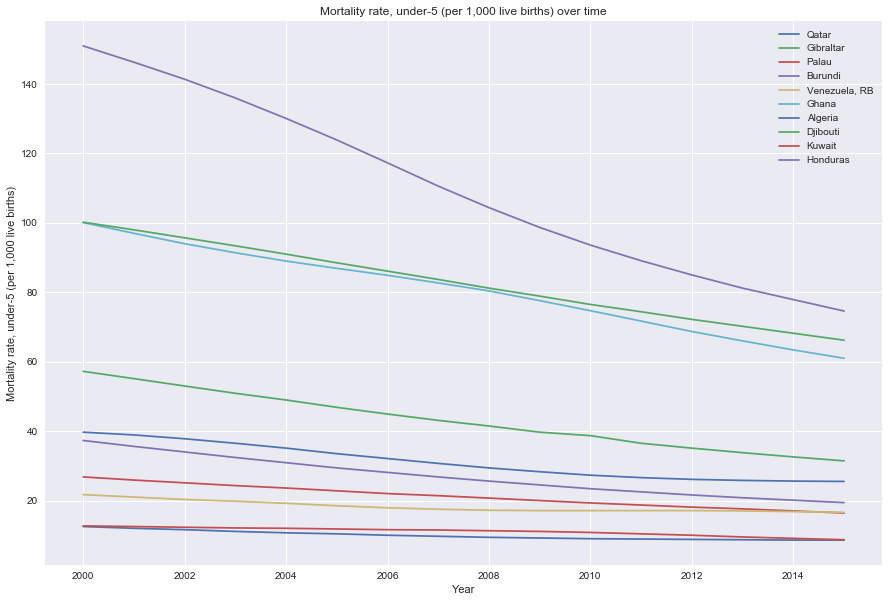

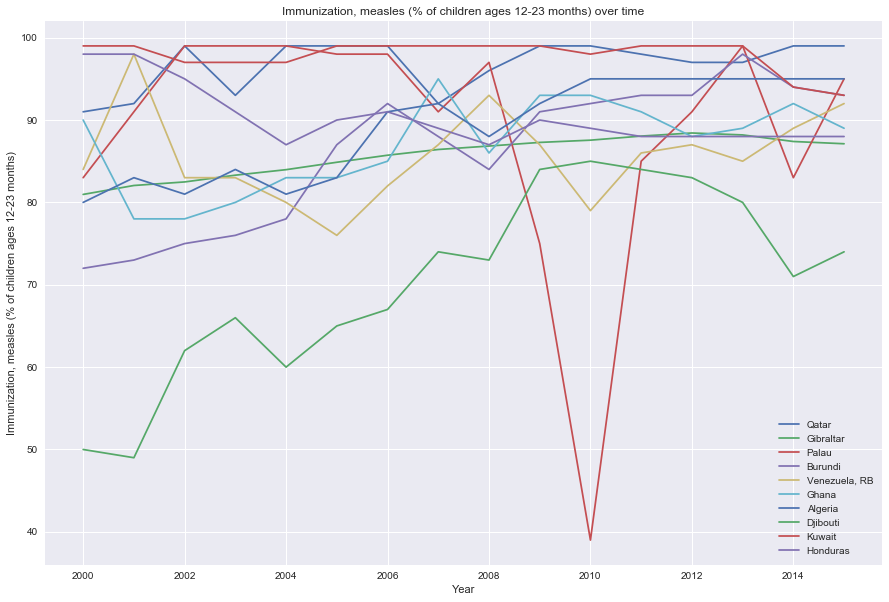

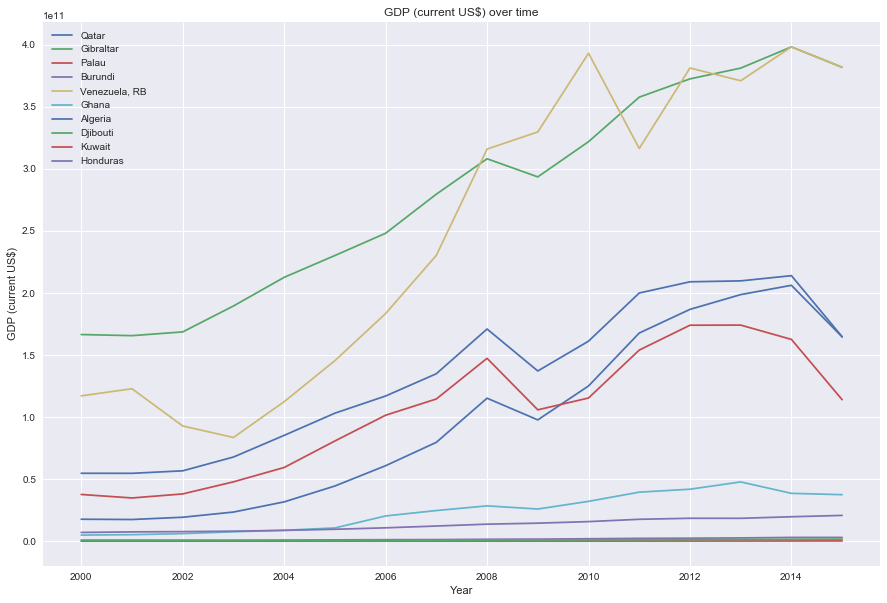

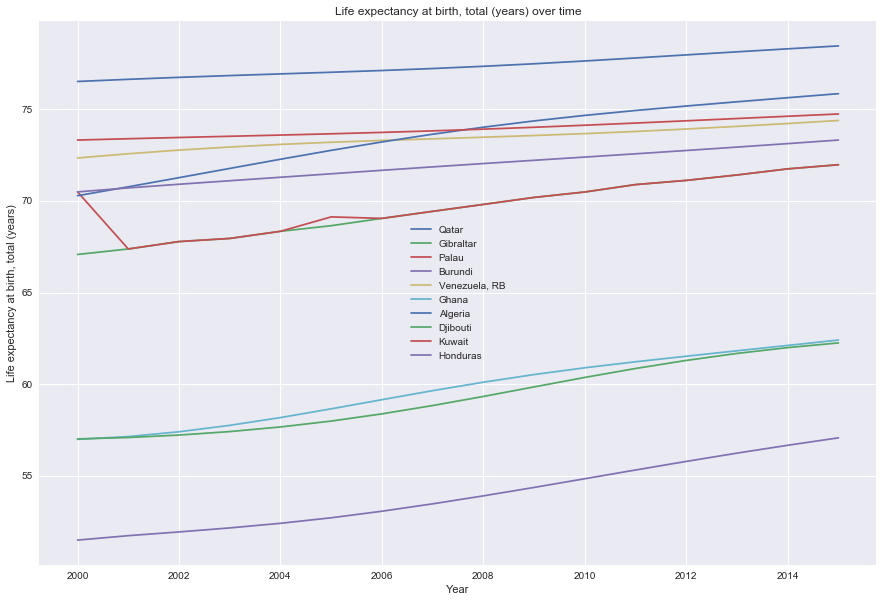

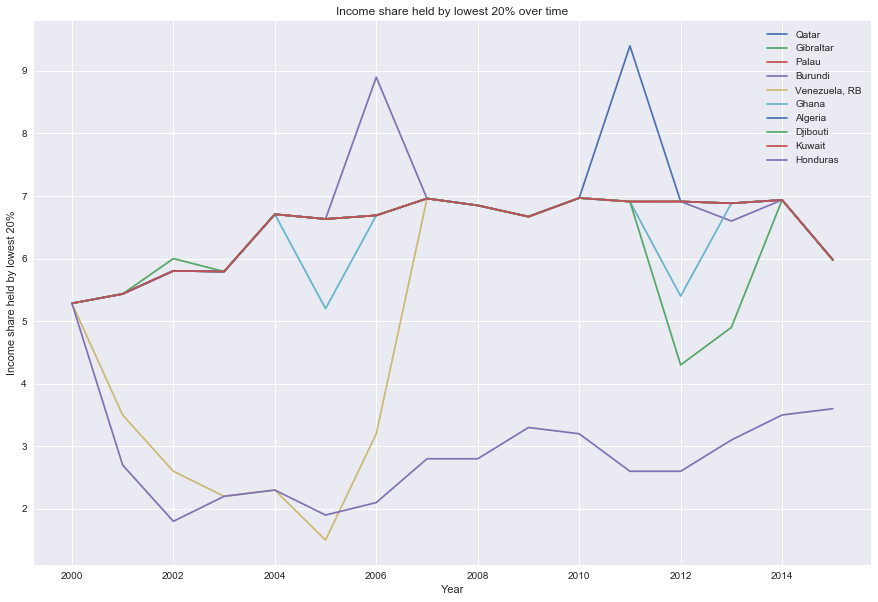

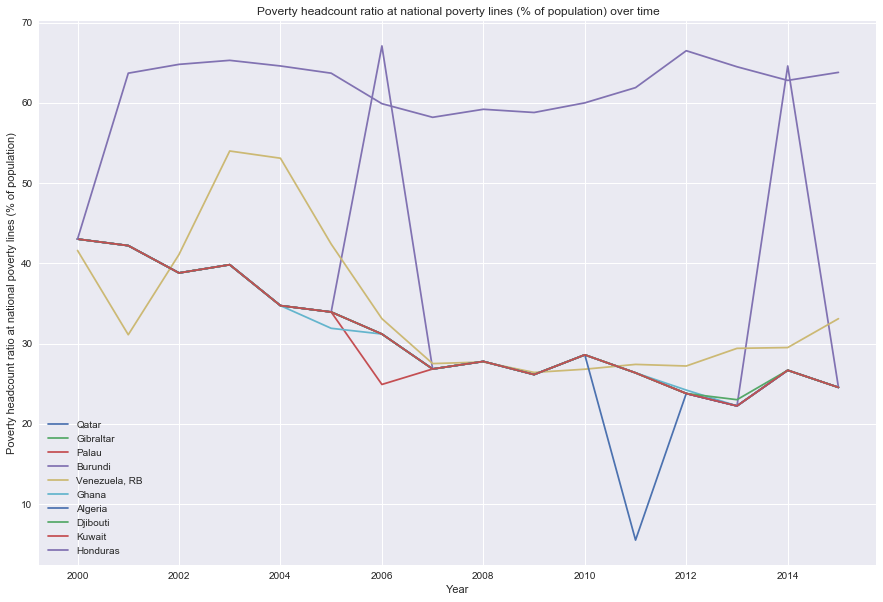

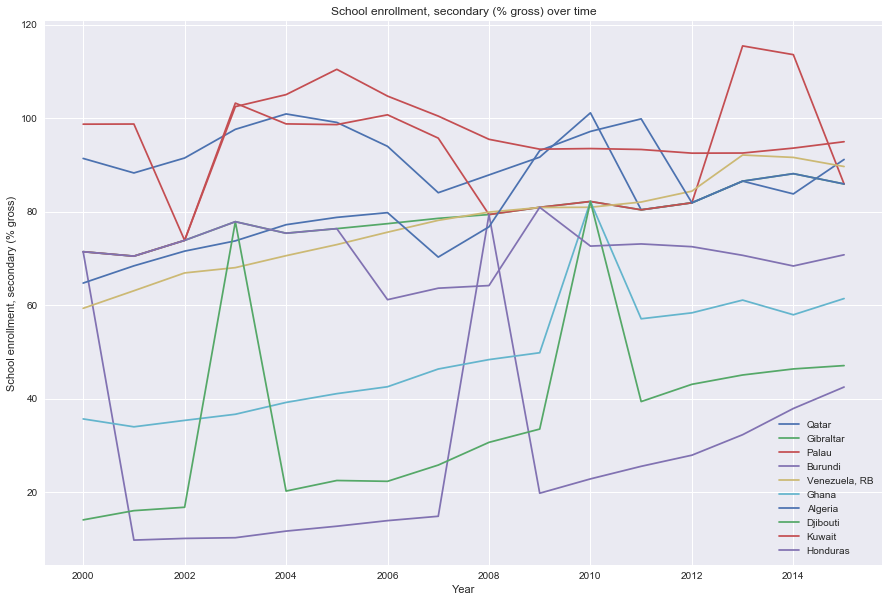

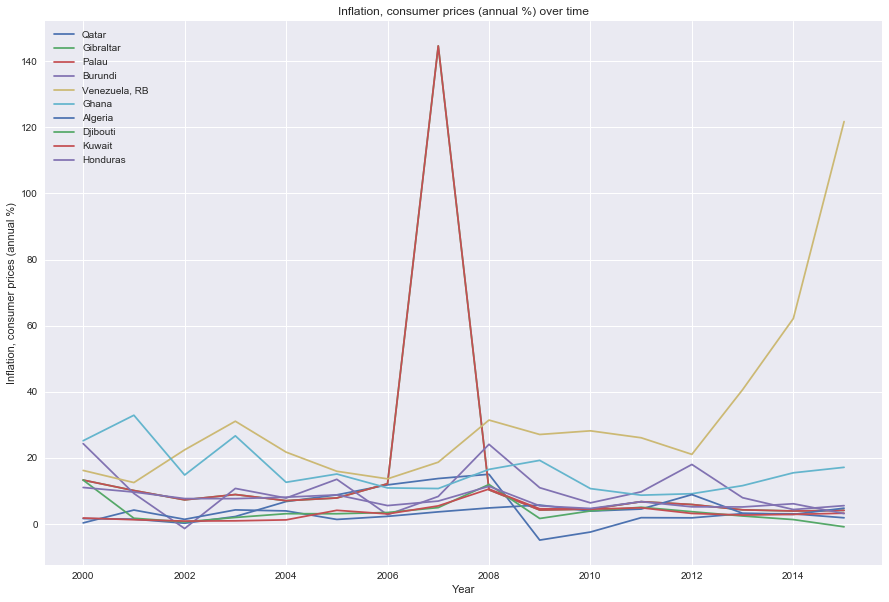

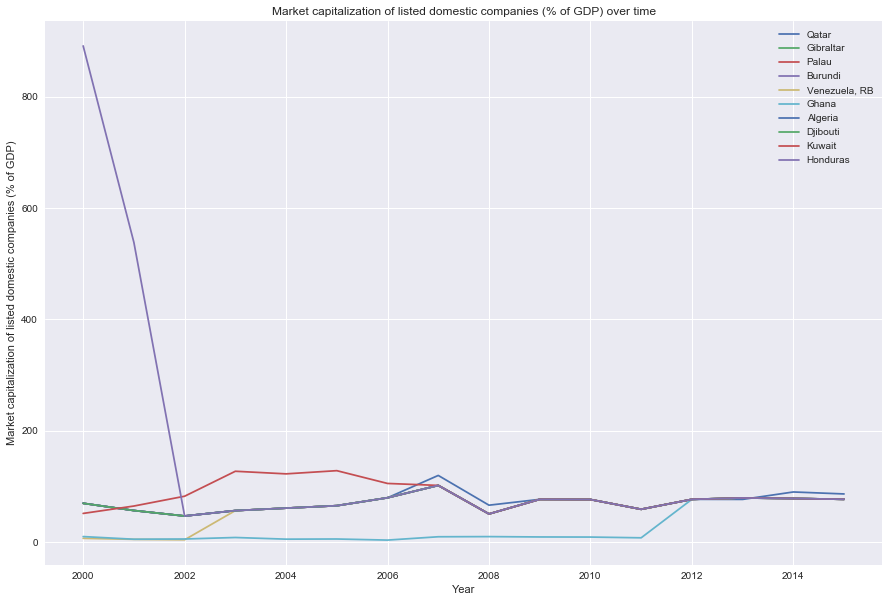

In [5]:
# Get a random sample of countries using the first dataframe of the dataframe array
s = top_dfs[0].sample(10)
sample_map = {}

# Get their indices and country names, respectively
s_indices = s['index'].values
s_values = s['Country Name'].values

# Maps country name to respective index for later use
for i in range(len(s_values)):
    sample_map[s_values[i]] = s_indices[i]

i = 0

# Loops through each indicator stored in the array of dataframes and plots the sample of countries over 2000-2015
for data_frame in top_dfs:
    indicator = top_indicators[i]
    
    figure, axel = plt.subplots(figsize=(15, 10))
    
    for country in s_values:
        c = data_frame.groupby("Country Name").get_group(country)
        
        years = []
        vals = []
        for year in range(2000, 2016):
            years.append(year)
            vals.append(c[str(year)][sample_map[country]])
            
        plt.plot(years, vals, label=country)
        
        # Create respective plot for indicator collected
        axel.set_ylabel(indicator)
        axel.set_xlabel("Year")
        axel.set_title("%s over time"%(indicator))
        handles, labels = axel.get_legend_handles_labels()
        axel.legend(handles, labels)

    plt.show()
    
    
    i+=1

### 2.2 Potential Conclusions

As noted earlier, it can be difficult to draw general conclusions based on this random sample. However, here are some general conclusions that can be inferred, based on our graphs:

* For most countries, it is safe to say that their populations are on a slight increasing trajectory rather than decreasing
* Overall, mortality rates either decreased or remained constant over the past sixteen years
* Measle immunizations, overall, are on an upward trend 
* Poverty headcount, for the most part, is has slightly decreased over time
* Market Capitalization has been very variable due to recent recessions, but as of recently (past 2-4 years), it has shot up

With these factors under consideration, we can generally say that the overall standard of life across the planet is on a slight uptrend. As of more recent years, countries have been utilizing resources to provide their citizens with better healthcare, better corporate policies for better market capitalizations, and an attempt to lower poverty levels. While this may not accurately reflect all countries across the globe, it does reflect a potential hypothesis that we can draw to later observe more critically with statistical experiment.

### 2.3 Folium Map Visualization

For the Map visualization we aimed to add some basics statistics of the most up to date information (i.e. 2015 data) about the 10 different popular indicators we chose initially. In order to locate the latitude and longitude for these individual countries, we utilized geopy, which is a python API in order for coders to locate and reverse locate to coordinate and or names of countries in order to overlay on a map. Geopy is an experimental API that works better with more information and in our case we are only passing in the country name which is inherently vague so geopy may give wrong coordinates or not even find it at all for some of our countries but rest assure that the statistics that we gather is correct. To put in the information we used the Folium Native marker to input the HTML representation of our data.

http://folium.readthedocs.io/en/latest/quickstart.html

In [6]:
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=2)

# initialize our geopy object for finfing coordinates
geolocator = Nominatim()
data = []

# choose a random sample from our dfs
random_sample = top_dfs[0].sample(n = 25).reset_index()


for i in random_sample.iterrows():
    element = i[1]
    country = element[3]
    
    # load location name into geopy object
    location = geolocator.geocode(country)
    
    # if geopy doesnt find a match we continue are loop
    if location is None:
        continue
    
    # get coordinates to overlay on our map
    coords = [location.latitude, location.longitude]
    stats = []
    
    i = 0
    
    for d in top_dfs:
        # loads statistical information into popup parameter in HTML format
        indicator = "<b>"+ top_indicators[i] + "</b>"
        info = str(d.loc[d['Country Name'] == country]['2015'].values[0])
        stats.append(indicator + ": " + info)
        i += 1
   
    description = "<b>" + country + "</b></br></br>" + "</br>".join(stats)
    folium.Marker(coords,
                  popup=description,
                  icon=folium.Icon(
                      color="red")).add_to(map_osm)
    

map_osm

### 2.4 Indicator Plots for our Case Study Countries

Now we want to drill down on the information that we have. We attempted to select the most well-off country overall (through the basis of wealth, GDP) from each continent, with the goal of comparing the wellbeing of each continent as a whole. Here are the countries we selected from the continents: 

* United States
* Brazil
* China
* Australia
* France
* Nigeria
* United Arab Emirates

For these plots we used plotly which is also a very new Python API; it is great for plotting data, we feel it makes it much easier to digest and more intuitive to use than Matplotlib. We decided to use this API just to show that there are many ways to skin a cat and that Python is such a great tool for creativity and just about anyone and make a great contribution and help someone else out. We will be performing Hypothesis Testing on these 7 countries later on and conduct ML on them to predict what 2016 may hold (although the World bank would be publishing their finding soon!). We locate the the different the different countries using pandas loc function kind of like list interpretation in python.

https://plot.ly/python/line-charts/

In [7]:
# locate the case study countries
s= top_dfs[0].loc[(top_dfs[0]['Country Name'] == 'United States') | (top_dfs[0]['Country Name'] == 'Brazil') |
                 (top_dfs[0]['Country Name'] == 'China') | (top_dfs[0]['Country Name'] == 'Australia') |
                 (top_dfs[0]['Country Name'] == 'France') | (top_dfs[0]['Country Name'] == 'Nigeria') |
                 (top_dfs[0]['Country Name'] == 'United Arab Emirates')]

sample_map = {}


s_indices = s['index'].values
s_values = s['Country Name'].values

for i in range(len(s_values)):
    sample_map[s_values[i]] = s_indices[i]

i = 0

for data_frame in top_dfs:
    indicator = top_indicators[i]
    
    trace = []

    for country in s_values:
        # group counties using pandas groupby function
        c = data_frame.groupby("Country Name").get_group(country)
        
        years = []
        vals = []
        
        # append vvalues for our plot
        for year in range(2000, 2016):
            years.append(year)
            vals.append(c[str(year)][sample_map[country]])
            
        # append a trace of our plot
        trace.append(go.Scatter(
            x =years,
            y =vals,
            name= country)) 
        
    data = trace
    
    # adds layout parameters to plot
    layout = go.Layout(title=indicator)
    data = trace

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    i+=1

### 2.5 Case Study Analysis

As you can see from our data we can draw some analysis about:

* Population: For all countries, we see a steady increase in population. However, for the sake of our geographic region comparison, it seems like China’s growth has the highest slope, which means it has the highest growth of all the countries that we are comparing. If we generalize this to the entire Asian continent, we can say that Asia, overall, has the highest growth of all continents. However, using a single sample is not good practice, so we will steer away from this generalization.
* Mortality Rate (under 5): As technology and healthcare go up the mortality rate slowly goes down. We can see that Nigeria specifically stood out as the most improved country, with the steepest slope of all countries within the sample. If this can be representative of the entire African continent, it can be said that Africa has had the most improvement in lowering their mortality rates. Still, however, Nigeria remains far above the rest of the countries within the sample. China and Brazil both did well at improving their respective mortality rates as well.
* Immunization: Overal the immunization rate is steady. Nigeria, which was below the other countries the entire time, has shown the most drastic growth, but still remains below the rest of the countries. Overall, most countries that are being compared here have very strong immunization rates, almost close to perfect.
* GDP: The GDP is generally going up across all countries. The United States is, by far, the most dominant player in this game. The next most dominant country is China, which is still well below the United States, but catching up at a rather fast pace. In contrast, countries like France and Brazil have actually gone backwards, with their total GDP going down overtime. This could be a product of many economical factors, including the large recessions that we have undergone over the past couple decades.
* Life Expectancy: The life expectancy for these companies are generally going up. The countries dominating the life expectancy sector appear to be France and Australia. This is likely a product of a variety of factors, including subsidized healthcare costs and more socialist-like policies. On the other hand, Nigeria has the lowest life expectancy, which has risen greatly over the past decade but still sits at around 53 years old. In perspective, France, Australia, and the USA are all closer to 80 years old.
* Inflation: Inflation is generally steady. All countries have very stable inflation throughout the entire decade. However, there is an interesting peak for the United Arab Emirates. They peak at around 2007 at around 140% inflation, and stabilize the following few years later. Due to the range of the graph, it is difficult to specifically analyze each country individually. They are all scattered towards the bottom, and the UAE extends the range by a factor of around 100 due to their drastic rise in 2007. Overall, countries appear to be doing well.



## 3. Machine Learning 

Machine learning is an awesome tool used my data scientists, data engineers, and statisticians to make forecasts about future. This is why we will be using it here to try and see how good our predictions are by using Scikit-learn and use various Machine Learning algorithms to see how closely out f(x) values are to our 2015 data. We will be using K-Nearest neighbours, Decision Trees, and Random Forests to see which is the best predictor of our data set (we felt that linear regression would be the best for this).

### 3.1 Define Learning Algorithms

This part took the longest due to all the intricacies of the different learning algorithms. We decided to abstract our code a little bit and define the functions that will predict our values in the background and we would only need to pass in the data frame to compute the values we need. We will then do some visualization in order to figure out which learning algorithm works best on our data. We have imported all the requisite libraries from Scikit-learn for us to utilize. The setup for the different learning algorithms are all inherently the same; we start by dropping all the unnecessary columns from our dataframe, in essence, all the columns that don't have a numerical value. We then cast the type of the dataframe that comes from it as integer values (this is required by most of the learning algorithms found in the Scikit-learn package for example multivariate logistic regression). Now we set our X training data and our y training data. The X training data is basically going to be a matrix of all the features in our data frame which will basically be te matrix spanning the years 2000 - 2014. The y training data will be a vector of the 2015 data that we will be predicting. We will also be setting the x test data and the y test data to the x training data and the y training data respectively. We then use our Classifiers predict function to run the algorithm and finally we will return the accuracy score, found in the Scikit-learn package to see how good of a predictor it is!

* Random Forest: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
* K-Nearest Neighbours: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Accuracy Score: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [8]:
def knn_ML(df):
    # initialize our KNN object with necessary parameters
    knnclf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
    
    # assign training data and testing data that we pass into out fit function
    trainX = testX = df.drop(['Series Name','Country Name','index',"2015"], axis=1).astype(int)
    trainY = testY = df['2015'].astype(int)
    knnclf.fit(trainX, trainY)

    # gather an accuracy measure and return
    knnprediction = knnclf.predict(testX)
    knnfinal = accuracy_score(testY,knnprediction)
    return knnfinal

def decision_ML(df):
    # initialize our Decision Tree object with necessary parameters
    treeclf = DecisionTreeClassifier(max_depth=5)

    # assign training data and testing data that we pass into out fit function
    trainX = testX = df.drop(['Series Name','Country Name','index',"2015"], axis=1).astype(int)
    trainY = testY = df['2015'].astype(int)
    treeclf.fit(trainX, trainY)

    treeprediction = treeclf.predict(testX)
    treefinal = accuracy_score(testY,treeprediction)
    return treefinal

def RF_ML(df):
    # initialize our Random Forest object with necessary parameters
    rfclf =  RandomForestClassifier(n_estimators=10)
    
    # assign training data and testing data that we pass into out fit function
    trainX = testX = df.drop(['Series Name','Country Name','index',"2015"], axis=1).astype(int)
    trainY = testY = df['2015'].astype(int)
    rfclf.fit(trainX, trainY)

    # gather an accuracy measure and return
    rfprediction = rfclf.predict(testX)
    rffinal = accuracy_score(testY,rfprediction)
    return rffinal


### 3.2 Test Algorithm and Generate Conclusions

Now we will put our machine learning functions to use and apply them to all the different Popular Indicators in our top_dfs array. We will visualize the strength of our predictive models using a bar graph that is bounded from zero to one which is essentially the score of how close our coefficients are to the real answers. Since we have encapsulated most of our code into functions the accuracy test is more straightforward. We will be inserting all my findings both into a dictionary to hold the current value as well as appending to an Numpy array that will be used to later to find the best algorithm to use for our data. We then display this in a bar graph below.

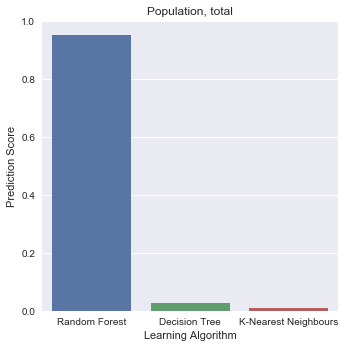

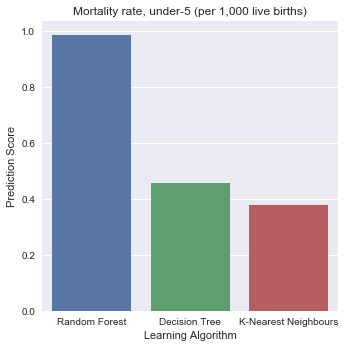

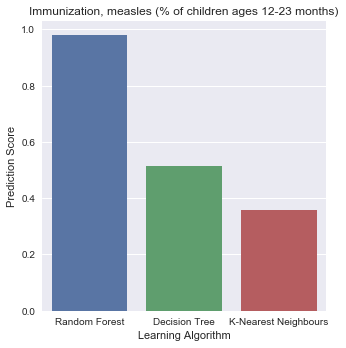

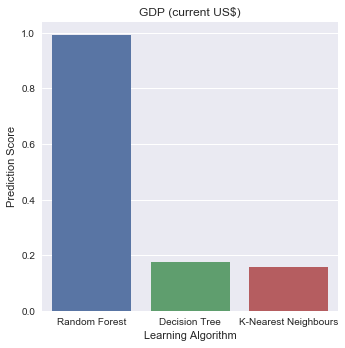

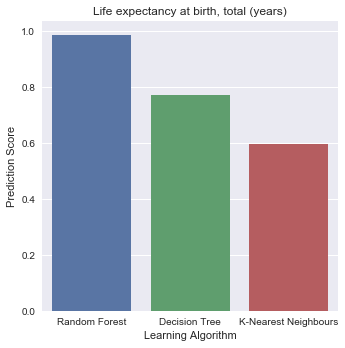

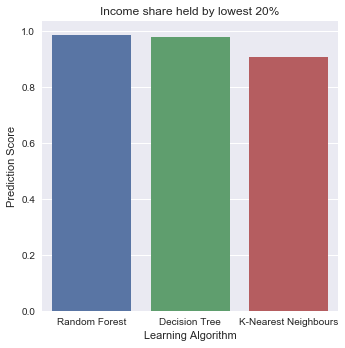

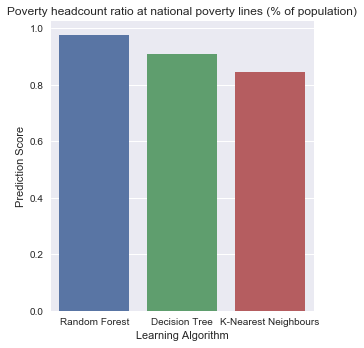

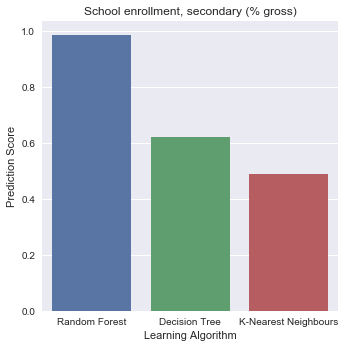

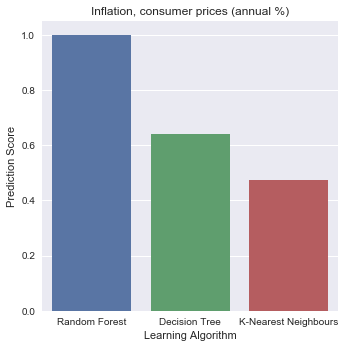

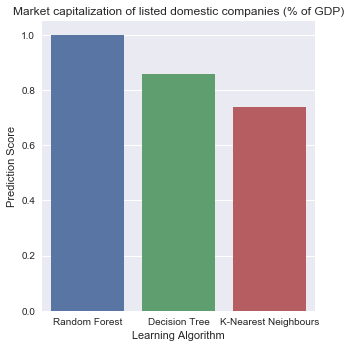

In [9]:
# initalize our dictionary that we will use to average predictions later 
mean_map = {
    'Random Forest': np.array([]),
    'Decision Tree': np.array([]),
    'K-Nearest Neighbours': np.array([])
}

for i in range(len(top_dfs)):
    # Initialize the plot
    f, ax = plt.subplots(figsize=(5,5))
    
    predict_map = {}

    # use algorithims defined above and load into our map for the plots
    predict_map['Random Forest'] = RF_ML(top_dfs[i])
    predict_map['Decision Tree'] = decision_ML(top_dfs[i])
    predict_map['K-Nearest Neighbours'] = knn_ML(top_dfs[i])
    
    # append our finings to the mean map above
    mean_map['Random Forest'] = np.append(mean_map['Random Forest'], predict_map['Random Forest'])
    mean_map['Decision Tree'] = np.append(mean_map['Decision Tree'], predict_map['Decision Tree'])
    mean_map['K-Nearest Neighbours'] = np.append(mean_map['K-Nearest Neighbours'], predict_map['K-Nearest Neighbours'])
    
    # create our dataframe to use for plot
    predict_df = pd.DataFrame.from_dict(data=predict_map, orient='index')
    predict_df['model'] = predict_df.index
    predict_df['prediction'] = predict_df[predict_df.columns.values[0]]
    
    # create plote using the dataframes
    sns.barplot(data=predict_df ,x=predict_df['model'], y = predict_df['prediction'], ax= ax)
    ax.set_title(top_indicators[i])
    ax.set_ylabel('Prediction Score')
    ax.set_xlabel('Learning Algorithm')

    plt.tight_layout()
    plt.show()

### 3.3 Mean of Testing Algorithms

In order to choose which of these learning algorithms is the best we must use some sort of metric to score them. Some methods we could use are the mean, the median , and the mode of our scores. In this case we feel that the mode is the ideal measure to use because there aren't many recurring scores found in the measly 10 Popular index predictors. We could use the mode because it is a robust descriptive statistic although there aren't very many instances. We feel that the most robust statistical measure is the mean because our range is normalized which means all the scores are standardized (in our case 0 to 1) and also because the mean is a very robust measure under the right circumstances.    
https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Descriptive_Statistics.pdf

Using this we made a similar bar plot as we did above utilizing my mean map which maps to a numpy array and we can use one if its native functions to find the mean. As we can see the Random Forest is the best Learning algorithm to use on our data with accuracy converging to 1 (the highest our predictors can get). The decision tree method is the second best with a score of 0.6 which we think is the case because Random Forest is a generalization of Decision trees because it combines a large number of specifically-built decision trees and reduces the generalization error of decision trees. Finally we have K-Nearest Neighbours which performed the worst although it put up a respectable fight with about a score of 0.5. This is probably because KNN is predicated on distance metrics and if we look at the ranges of some of the indicators we can see that some are very spread which can impede clustering.
* http://perclass.com/doc/guide/classifiers/decision_trees.html#sdrandforest
* https://datascience.stackexchange.com/questions/9228/decision-tree-vs-knn

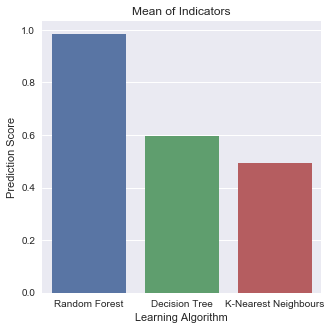

In [10]:
# now we find the average of of our preditions
mean_map['Random Forest'] = mean_map['Random Forest'].mean()
mean_map['Decision Tree'] = mean_map['Decision Tree'].mean()
mean_map['K-Nearest Neighbours'] = mean_map['K-Nearest Neighbours'].mean()

# Initialize the plot
f, ax = plt.subplots(figsize=(5,5))

# load information into a dataframe for plotting
mean_df = pd.DataFrame.from_dict(data=mean_map, orient='index')
mean_df['model'] = mean_df.index
mean_df['prediction'] = mean_df[mean_df.columns.values[0]]

# use dataframe to plot findings
sns.barplot(data=mean_df ,x=mean_df['model'], y = mean_df['prediction'], ax= ax)
ax.set_title("Mean of Indicators")
ax.set_ylabel('Prediction Score')
ax.set_xlabel('Learning Algorithm')

plt.show()

## 4. Hypothesis Testing

Based on all the data we have just explored, we would like to take a deeper look at some potential relationships between the indicators that we have selected. For example, one potential avenue worthy of additional exploration is to test whether a country’s total population has any correlation with their total GDP per year. The purpose of these comparisons is ultimately to develop a deeper understanding of some of these indicators and make generalizations about how factors relate to one another. After choosing our desired indicators, we locate the exact dataframes that the indicators correlate to via our discretized list of dataframes, and we loop through each year of data that is present inside the dataframe, add the points to our sample, and perform a Linear Regression test on them through Scikit-learn’s built in regression methods. We simply use the ‘.fit’ function and pass the two variables that we are comparing with one another into it, and this spits out the correlation coefficient in return. This coefficient can provide us with some very useful insight, and we can later visually confirm our predictions. 

First, we simply plot each of the data points that we are observing against each other on a scatter plot. Subsequently, we can use the ‘.predict’ function provided in the same Scikit-learn library to generate the regression line and in order to see any overarching trends present among our data. This can be very useful for visually confirming the correlation that the coefficient conveys to us, and can either confirm or reject whether a correlation even exists for the two indicators that we selected.

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### 4.1 Choose Our Hypothesis

First, want to test to see if there is a correlation between the income share held by the lowest 20% of a population and proportion of a population that sits at or below national poverty lines.
 
Our hypothesis is: As the income share held by the lowest 20% of the population increases, the proportion of individuals at or below natinoal poverty levels decreases. We expect a negative correlation.

### 4.2 Test Our Hypothesis

Now that we have a hypothesis, we need to validate or invalidate it using the data we collected. As we mentioned earlier, this is a simple procedure that can be leveraged with Scikit-learn’s built in regression functions. Here is the general procedure we followed: 

* We must instantiate a LinearRegression() object first; this will be used for later reference.
* Next, we utilize the list of dataframes that we created earlier to locate the features that are being compared. With our indicator_map, the index that corresponds with our desired indicators are easy to locate. 
* Using these indices, we create references to the desired dataframes from our array, the income share held by lowest 20% dataframe and the poverty headcount at national levels dataframe. 
* Afterwards, we reference the series that corresponds to the column of the of the first year of data available to us; in this case, it is 2000. 
* Due to the inherent constraints of the format we received our data in, we must manually loop through every other column, or year, within the dataframes from 2001-2015 and append them to each of our series. This will maximize the number of points available to pass into our regression model, leading to the most accurate coefficient and ultimately a more accurate response.
* Ultimately, the two series we generate correspond to the compilation of 2000-2015 data available for income share held by lowest 20% across all countries and poverty headcount at national levels, respectively.
* Lastly, we use Scikit-learn’s ‘.fit’ function to pass in both series and this produces our desired coefficient


In [11]:
# Initialize linear regression data object
regData = linear_model.LinearRegression()

# Pull the indices of the indicators with the dictionary we created earlier
income_idx = indicator_map['Income share held by lowest 20%']
pov_idx = indicator_map['Poverty headcount ratio at national poverty lines (% of population)']

# Create references for each of the corresponding dataframes for income share and poverty headv 
income_df = top_dfs[income_idx]
poverty_df = top_dfs[pov_idx]

# Start it off with the first year year of the period on the table
x = income_df['2000']
y = poverty_df['2000']

# Append all other years to the table 
for year in range(2001, 2016):
    x = x.append(income_df[str(year)])
    y = y.append(poverty_df[str(year)])

regData.fit(x.values.reshape(-1,1), y)

print('Coefficients: \n', 1/regData.coef_)

Coefficients: 
 [-0.28383694]


### 4.3 Interpreting Coefficient and Creating Scatter Plot

As we can see above, the correlation coefficient is approximately -0.28. This means that we should expect a negative correlation that is rather weak, but noticeable. Let’s go ahead and run through the steps required to visually confirm our discovery and perform an analysis.

We must start off by initializing a scatter plot through the standard procedure outlined in their documentation:
https://pythonspot.com/matplotlib-scatterplot/

Afterwards, we are required to re-initialize our variables, due to the fact that they were manipulated while calculating their coefficients. Lastly, we generate a scatter plot in which we simultaneously plot our values along with the predicted regression line by using ‘regData.predict’ from Scikit-learn’s library. Below, you can see the output of our code.

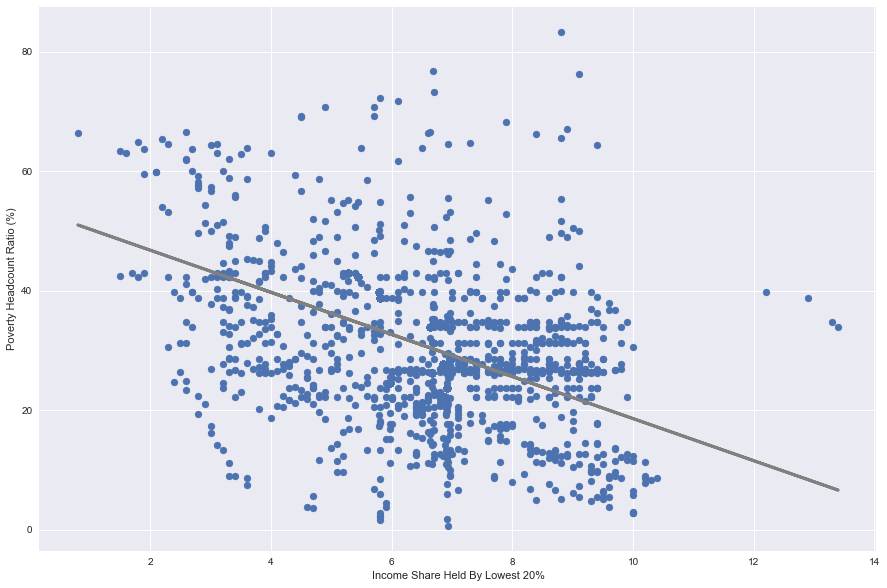

In [12]:
# Initialize the plot
figure, axel = plt.subplots(figsize=(15, 10))

# Create Scatterplot
plt.scatter(x,y)

# Sets the x and y-axis labels
plt.ylabel('Poverty Headcount Ratio (%)')
plt.xlabel('Income Share Held By Lowest 20%')

# Re-initializes the series
x = income_df['2000']
y = poverty_df['2000']

for year in range(2001, 2016):
    x = x.append(income_df[str(year)])
    y = y.append(poverty_df[str(year)])



plt.plot(x.values.reshape(-1,1), regData.predict(x.values.reshape(-1,1)), color='gray', linewidth=3)
plt.show()

### 4.4 Follow-up Analysis

It can be visually confirmed through both our regression line and scatter plot that the correlation is negative. However, as the scatterplot shows, the correlation is not the strongest. We want to aim for a number closest to -1 or 1, which corresponds to a perfect correlation. In this case, there is certainly proof of some correlation, but not all that much. In terms of our actual hypothesis, it shows that there is SOME, not a lot, of correlation between the income share held by the lowest 20% of a population and proportion of a population that sits at or below national poverty lines. The relationship makes contextual sense, because the graph essentially says that, as the income share held by the lowest 20% of the population goes up, the poverty headcount ratio within their country goes down. This was the anticipated relationship that we expected going into this.

### 4.5 Feeling ambitious? Lets Try Another Hypothesis!

We realized that we selected ten different indicators, and our hypothesis above only tested two. So we wanted to follow up and test a couple different indicators for the sake of better understanding our data!


Or second hypothesis aims to test the relationship between one’s total life expectancy at birth, in years, against the mortality rate, under-5 (per 1,000 live births). 

For our hypothesis, we predict that higher life expectancies at birth correspond with lower mortality rates for children under 5 in different countries. Once again, we are expecting a negative correlation.

Let’s repeat the same exact steps outlined above, only now with our revised features!

In [13]:
regData = linear_model.LinearRegression()

life_exp_idx = indicator_map['Life expectancy at birth, total (years)']
mort_idx = indicator_map['Mortality rate, under-5 (per 1,000 live births)']

life_exp_df = top_dfs[life_exp_idx]
mort_df = top_dfs[mort_idx]

figure, axel = plt.subplots(figsize=(15, 10))


x = life_exp_df['2000']
y = mort_df['2000']

for year in range(2001, 2016):
    x = x.append(life_exp_df[str(year)])
    y = y.append(mort_df[str(year)])
regData.fit(x.values.reshape(-1,1), y)

print('Coefficients: \n', 1/regData.coef_)

Coefficients: 
 [-0.23624645]


### 4.6 Coefficient interpretation

Once again, our correlation coefficient is approximately -0.24, which indicates the presence of slight negative correlation. Let’s follow the same steps as we performed above to visualize this prediction.

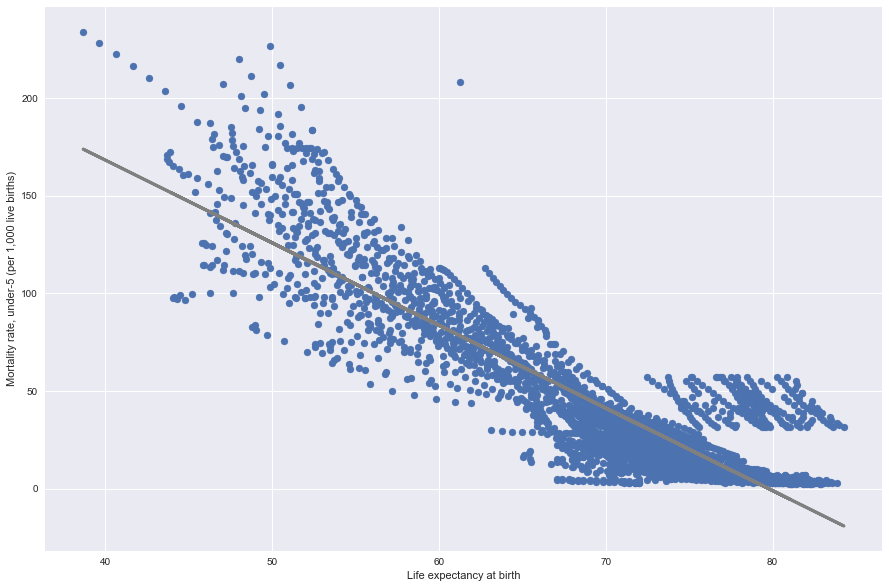

In [15]:
figure, axel = plt.subplots(figsize=(15, 10))

plt.ylabel('Mortality rate, under-5 (per 1,000 live births)')
plt.xlabel('Life expectancy at birth')

x = life_exp_df['2000']
y = mort_df['2000']

for year in range(2001, 2016):
    x = x.append(life_exp_df[str(year)])
    y = y.append(mort_df[str(year)])

plt.scatter(x,y)

plt.plot(x.values.reshape(-1,1), regData.predict(x.values.reshape(-1,1)), color='gray', linewidth=3)

plt.show()

### 4.7 Follow-up Analysis

Our correlation coefficient and plots indicate the presence of some negative correlation, once again. Personally, I was surprised that the correlation is weaker than the previous one, given how the scatterplot turned out visually. It is only slightly weaker than the one before, but our data is still indicative of the presence of a correlation. This also makes contextual sense and follows our hypothesis, as it indicates that countries with higher life expectancies at birth typically correspond to lower mortality rates upon birth. This is most likely due to the presence of better healthcare infrastructures across different countries along with some having higher standards of living compared to others.

## 5. Conclusion

Data science is an awesome way for Computer scientists, Statisticians, and Mathematicians to make forecast of the future. It's a continuous process that you make more and more head way into the problem as we got forward. As you can see we have successfully traversed the whole data science pipeline:
* Data Collection
* Data Processing and Tidying
* Exploratory Data Analysis and Data Visualization
* Analysis, Machine Learning and Hypothesis Testing
* Insights, Forecasts and Decisions

These steps are not mutually exclusive and it is possible that one step could lead to a previous step that needs to be accounted for: We definitely had to step backwards to Tidying our data when we hit Machine Learning and Hypothesis Testing!

We can see from our ML that if we wanted to predict 2016 or even 2017 Popular indicators that our go to Learning Algorithm would be the Random Forest Algorithm with a very promising score but if we would like to put accuracy at the back burner and reduce computation we could use the Decision Tree Algorithm as we saw that Random Forest is the superset of the Decision Tree. There are still a multitude of different learning algorithms out there and we only scratched the surface a of a few Supervised learning ones which is a subset of Artificial Intelligence. Some other classifications of learning algorithms are: Unsupervised, Reinforcement, and  Deep Learning. We challenge you to to predict 2016 scores when the World Bank publishes them and see how accurate you get your values to be!

Alternatively, we can see from hypothesis testing that we can test the presence of correlation between two seemingly relevant factors through the virtue of a basic regression test. By leveraging these tests, we can see test the strength of potential correlations by the coefficients, and visually confirm these correlations using scatterplots and predicted regression lines. The goal of these tests are to ultimately help you understand your data better and make inferences about different situational infrastructures beyond the data presented to you. It will effectively convert the data from raw numbers into real insight about a more meaningful problem being approached beyond it.

Ultimately, Data Science has been proven as a wonderful discipline, and CMSC 320 has done an incredible job exposing us to some of the basics! We hope you enjoyed following our tutorial!